In [1]:
!pip install rake-nltk

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer

from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import spacy
from sklearn.model_selection import train_test_split

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report



from rake_nltk import Metric, Rake

In [3]:
def load_data(data): #reading file function
  read_file = pd.read_csv(data) #read csv file
  return read_file #look at the data

In [4]:
file = '/content/netflix_titles.csv' #file path
df = load_data(file) #pass in file path into the load data function
df.head(1) #looking at the data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [5]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

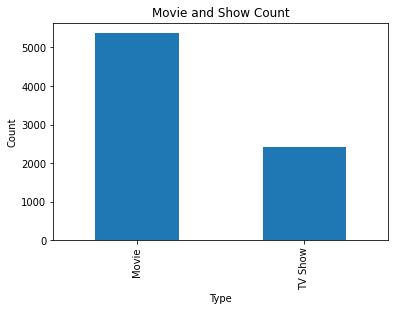

In [6]:
df['type'].value_counts().plot(kind='bar',xlabel='Type', ylabel='Count',title='Movie and Show Count')

In [7]:
df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

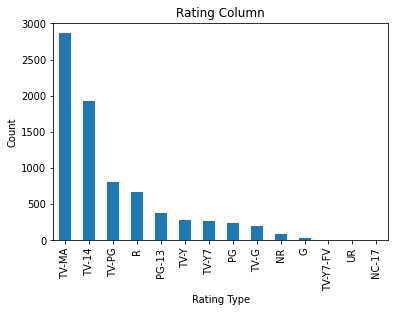

In [8]:
df['rating'].value_counts().plot(kind='bar', xlabel='Rating Type', ylabel='Count', title='Rating Column')

In [9]:
df['description'] = df['description'].str.lower()
df['description']

0       in a future where the elite inhabit an island ...
1       after a devastating earthquake hits mexico cit...
2       when an army recruit is found dead, his fellow...
3       in a postapocalyptic world, rag-doll robots hi...
4       a brilliant group of students become card-coun...
                              ...                        
7782    when lebanon's civil war deprives zozo of his ...
7783    a scrappy but poor boy worms his way into a ty...
7784    in this documentary, south african rapper nast...
7785    dessert wizard adriano zumbo looks for the nex...
7786    this documentary delves into the mystique behi...
Name: description, Length: 7787, dtype: object

In [10]:
def tokenization(token_colum):
  column_to_tokenize = token_colum['description']
  token = nltk.word_tokenize(column_to_tokenize)
  words = [w for w in token if w.isalpha()]
  return words

In [11]:
df['description_tokens'] = df.apply(tokenization,axis=1)
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,description_tokens
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",in a future where the elite inhabit an island ...,"[in, a, future, where, the, elite, inhabit, an..."


In [12]:
sw = set (stopwords.words('english'))

def stpWords_fun(stpWords):
  lst_stpw = stpWords['description_tokens']
  cleaned = [w for w in lst_stpw if not w in sw]
  return cleaned 

In [13]:
df['stopwords_removed'] = df.apply(stpWords_fun,axis=1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,description_tokens,stopwords_removed
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",in a future where the elite inhabit an island ...,"[in, a, future, where, the, elite, inhabit, an...","[future, elite, inhabit, island, paradise, far..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",after a devastating earthquake hits mexico cit...,"[after, a, devastating, earthquake, hits, mexi...","[devastating, earthquake, hits, mexico, city, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","when an army recruit is found dead, his fellow...","[when, an, army, recruit, is, found, dead, his...","[army, recruit, found, dead, fellow, soldiers,..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","in a postapocalyptic world, rag-doll robots hi...","[in, a, postapocalyptic, world, robots, hide, ...","[postapocalyptic, world, robots, hide, fear, d..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,a brilliant group of students become card-coun...,"[a, brilliant, group, of, students, become, ex...","[brilliant, group, students, become, experts, ..."


In [14]:
stemming = SnowballStemmer('english')
sw = set (stopwords.words('english'))

def stem_fun(column):
  to_stem = column['description_tokens']
  stemmed = [stemming.stem(w) for w in to_stem]
  return stemmed

In [15]:
df['description_stemmed'] = df.apply(stem_fun, axis=1)
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,description_tokens,stopwords_removed,description_stemmed
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",in a future where the elite inhabit an island ...,"[in, a, future, where, the, elite, inhabit, an...","[future, elite, inhabit, island, paradise, far...","[in, a, futur, where, the, elit, inhabit, an, ..."


In [16]:
df = df.drop(columns=['show_id','cast','country',
                      'date_added','release_year','duration',
                      'listed_in','description_tokens','stopwords_removed', 'duration']) #drop columns not needed to analysis df.drop(dropped_columns, inplace=True )
df.to_csv('processed_data.csv', index=False)